<table>
    <tr style="background-color:white;">
        <td width="60%">
            <div style="height: 25px;"></div>
            <div align="left" style="color: #4b324e; font-size: 40px; font-weight: bold;">Taller de Qiskit</div>
        </td>
        <td>
            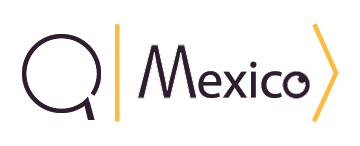
        </td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<div align="center" style="color: #EE2A6F; font-size: 30px; font-weight: bold;">Qiskit Pulse</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Preparado por Diego Aguilar Muñoz</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contenido

1. [Introducción](#intro)
2. [Calibración de una compuerta de pulso](#secc1)
3. [Compuerta personalizada](#secc2)
4. [Referencias](#secc3)

<a id="intro"></a>
# Introducción

La gran mayoría de los algoritmos cuánticos se pueden implementar por medio de las compuertas lógicas que describimos anteriormente. Sin embargo, si queremos tener control sobre la implementación de bajo nivel de un algoritmo, podemos utilizar *Compuertas de Pulso*. Las compuertas de pulso son calibradas para simular una compuerta lógica cuántica por medio de un programa de Qiskit Pulse conocido como `Schedule`. Una calibración con alta fidelidad va a implementar la operación lógica que se calibró, por ejemplo, si se calibra una compuerta X, al aplicar la compuerta de pulso lleva del estado $\ket{0}$ a $\ket{1}$.

Una *Schedule* especifica la dinámica de la señal (amplitud, frecuencia y duración del pulso). Es importante notar que los pulsos operan sobre qubits físicos, por lo que la calibración sobre un qubit *a* no va a realizar la misma operación lógica sobre un qubit *b*, es decir, las compuertas de pulso no son intercambiables entre qubits. En el caso de las compuertas lógicas esto no es cierto, una compuerta *X* está bien definida independientemente del qubit sobre el cual se aplica. El propósito de este notebook será mostrar la implementación de una compuerta de pulso a un circuito.

In [1]:
from qiskit import QuantumCircuit, pulse
from qiskit.circuit import Gate
from qiskit.pulse.library import Gaussian
from qiskit.test.mock import FakeValencia

<a id="secc1"></a>
# Calibración de una compuerta de pulso

Podemos empezar por implementar la calibración de la compuerta Hadamard en un estado entrelazado, por lo que podemos empezar por definir nuestro circuito.

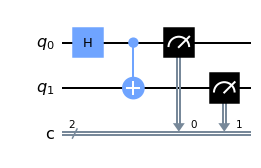

In [2]:
# Definimos nuestro circuito e implementamos un estado entrelazado
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0,1)
circ.measure(0,0)
circ.measure(1,1)

# Visualizamos el circuito
circ.draw(output='mpl')

Ahora que tenemos el circuito podemos empezar a definir la calibración para la compuerta Hadamard. En la práctica, la forma y los parámetros del pulso se optimizarían por medio de una serie de pruebas conocidas como experimentos de Rabi. Si quieres conocer con mayor detalle de estos experimentos, puedes consultar el siguiente <a href="https://qiskit.org/textbook/ch-quantum-hardware/calibrating-qubits-pulse.html">enlace</a>.

De la misma forma, la construcción de la *Schedule* sale de los propósitos de este taller, pero si quieres conocer los tipos de pulsos que puedes implementar y sus parámetros, puedes obtener más información en el siguiente <a href="https://qiskit.org/documentation/tutorials/circuits_advanced/06_building_pulse_schedules.html">enlace</a>.

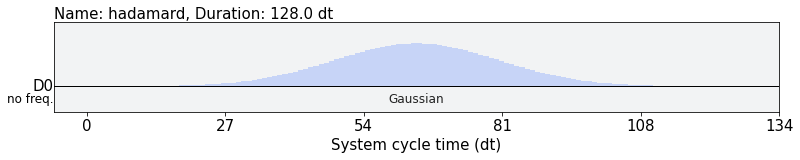

In [3]:
# Definimos nuestro backend, en este caso simulamos el dispositivo de 5 qubits de IBM conocido como Valencia
backend = FakeValencia()

# Construimos un pulso gaussiano con amplitud de 0.1, desviación estándar de 16 y duración de 128
#  y se guarda con el nombre h_q0
# todas las unidades están en SI (Hz, sec, etc.)
with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))

h_q0.draw()

Ya hemos creado nuestro pulso, el siguiente paso es implementarlo sobre nuestro circuito. Para esto se utiliza el método `add_calibration`, el cual toma como argumentos: la compuerta a calibrar (`string`), el qubit sobre el cual está aplicada (`int`), la *Schedule* y los parámetros de la compuerta (`float`). Se debe notar que la compuerta puede ser el método con el que se implementa en un circuito o el nombre de la compuerta. Debemos notar que en este caso la compuerta Hadamard no toma parámetros ya que representa una rotación en un ángulo definido, por lo tanto ese último argumento va a ser omitido.

In [4]:
# Aplicamos la Schedule definida a la compuerta Hadamard aplciada sobre el primer qubit
circ.add_calibration('h', [0], h_q0)

Finalmente, es importante notar que si se aplica el transpilador al circuito, la compuerta definida va a mantener la calibración aplicada. Incluso se debe notar que al aplicar el transpilador, las compuertas calibradas no se van a descomponer en compuertas de rotación como normalmente lo harían.

<a id="secc2"></a>
# Compuertas personalizadas

Ahora podemos realizar el mismo proceso para una compuerta personalizada, para esto se utiliza la clase `Gate()` colocando los parámetros de la compuerta en el argumento

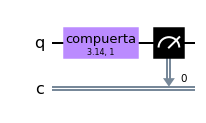

In [5]:
# Definimos al circuito
circ = QuantumCircuit(1,1)

# Definimos la compuerta personalizada
compuerta = Gate('compuerta', 1, [3.14, 1])

# Aplicamos la compuerta y una medicón
circ.append(compuerta, [0])
circ.measure(0,0)

circ.draw(output='mpl')

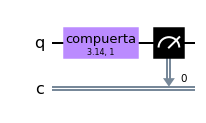

In [6]:
# Aplicamos un pulso gaussiano con duración de 64 , amplitud de 0.2 y desviación estándar de 8
# todas las unidades están en SI (Hz, sec, etc.)
with pulse.build(backend, name='compuerta') as schedule:
    pulse.play(Gaussian(duration=64, amp=0.2, sigma=8), pulse.drive_channel(0))

# Aplicamos la calibración a la compuerta
circ.add_calibration('compuerta', [0], schedule, [3.14,1])

circ.draw(output='mpl')

<a id="secc3"></a>
# Referencias

- [1] Qiskit Development Team. Qiskit Tutorials: Pulse gates. Consultado en https://qiskit.org/documentation/tutorials/circuits_advanced/05_pulse_gates.html 

<table width="100%">
    <tr style="background-color:white;">
        <td>
            <div style="text-align: left;">
            <a href="02_transpilador.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                &lt;&lt; Notebook anterior: Transpilador
            </a>
            </div>
        </td>
        <td>
            <div style="text-align: right;">
            <a href="04_algoritmos.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                Notebook siguiente: Implementación de algoritmos >>
            </a>
            </div>
        </td>
    </tr>
</table>